# Trabalho 1 

O objetivo deste exercício é estudar o comportamento de algoritmos de busca em linha em duas funções diferentes. O método utilizado será o de Falsa Posição.

## Importando bibliotecas

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

## Construindo funções necessárias para o exercício

Serão implementadas duas funções: uma quadrática e a função de Rosenbrock, dadas respectivamente por:

$$ f_Q(\vec{x}) = x_1² + 2x_2² + x_1x_2 - 2x_1 + x_2$$
$$ f_R(\vec{x}) = 100(x_1 - x_2^2)² + (1 - x_1)² $$

Seus gradientes são dados por:

$$ \nabla f_Q(\vec{x}) = [2x_1 + x_2 - 2,\hspace{5pt} 4x_2 + x_1 + 1]^T$$
$$ \nabla f_R(\vec{x}) = [ 200(x_1 - x_2^2) -2(1 - x_1),\hspace{5pt} -400(x_1 - x_2^2)x_2]^T$$

In [229]:
# Calculando o valor de apenas um ponto do domínio das funções e gradientes
def _fR(x:np.ndarray):
    return 100*( (x[0] - x[1]**2)**2) + (1 - x[0])**2 

def _fQ(x:np.ndarray):

    Q = np.array([[2, 1], [1, 4]])
    b = np.array([-2, 1])

    return (1/2)*x.T @ Q @ x + b.T @ x

def _grad_fR(x:np.ndarray):
    return np.array([200*( (x[0] - x[1]**2)) - 2*(1 - x[0]) , 
            -400*( (x[0] - x[1]**2)*x[1] )]) 

def _grad_fQ(x:np.ndarray):
    
    Q = np.array([[2, 1], [1, 4]])
    b = np.array([-2, 1])

    return Q @ x + b

def _hessian_fQ(x:np.ndarray):
    Q = np.array([[2, 1], [1, 4]])
    return Q

def _hessian_fR(x:np.ndarray):
    return np.array([[202, -400*x[1]], 
                    [-400*x[1], -400*x[0]+1200*x[1]**2]])

# Criando cortes das funções em termos de vetores de direção e deslocamento
def _functionCut(function:callable, point:np.ndarray, direction:np.ndarray):
    return function(point) @ direction

def functionCut(function, domain, direction):
    functionValues = np.zeros((domain.shape[0]))
    for i in range(domain.shape[0]):
        functionValues[i] = _functionCut(function, domain[i], direction)
    return functionValues


def quadraticGradientCut(*, shift:np.ndarray, direction:np.ndarray, alpha):
    return direction.T @ _grad_fQ(shift + alpha*direction)

def rosenbrockGradientCut(*, shift:np.ndarray, direction:np.ndarray, alpha):
    return direction.T @ _grad_fR(shift + alpha*direction)

# Calculando o valor das funções em todo o seu domínio para plots
def fR(x0:np.ndarray, x1:np.ndarray):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[j, i] = _fR(np.array([x0[i], x1[j]]))
    return functionValues

def fQ(x0:np.ndarray, x1:np.ndarray):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[j, i] = _fQ(np.array([x0[i], x1[j]]))
    return functionValues

## Visualizando funções

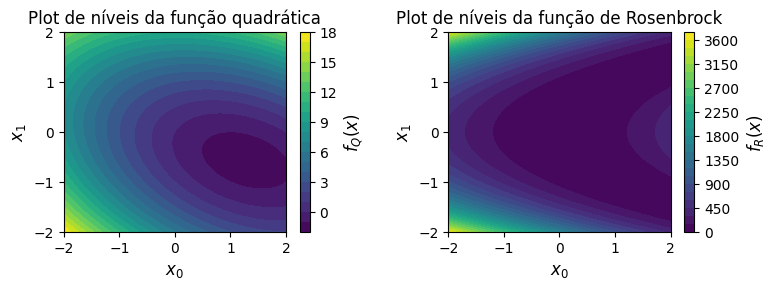

In [230]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)

functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot de níveis da função quadrática', fontsize=12)
ax1.axis('tight')

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot de níveis da função de Rosenbrock', fontsize=12)
ax2.axis('tight')

plt.tight_layout()
plt.show()

## Criando um corte da função gradiente 

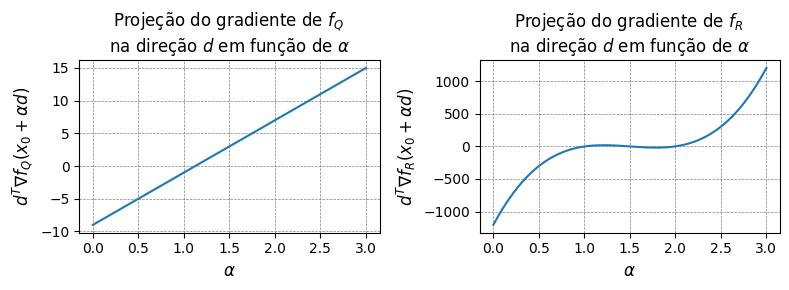

In [231]:
# Calculando valores das funções 
alphas = np.linspace(0, 3, 1000)
direction = np.array([1,1])
shift = np.array([-1,-1])
points = np.array([alpha * direction + shift for alpha in alphas])

quadraticGradientCut = partial(quadraticGradientCut, shift=shift, direction=direction)
rosenbrockGradientCut = partial(rosenbrockGradientCut, shift=shift, direction=direction)

quadraticGradientValues = np.array([quadraticGradientCut(alpha=alpha) for alpha in alphas])
rosenbrockGradientValues = np.array([rosenbrockGradientCut(alpha=alpha) for alpha in alphas])


# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
ax1.grid(color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax1.plot(alphas, quadraticGradientValues, zorder=2)
ax1.set_xlabel('$\\alpha$', fontsize=12)
ax1.set_ylabel('$d^{T}\\nabla f_Q(x_0 + \\alpha d)$', fontsize=12)
ax1.set_title('Projeção do gradiente de $f_Q$ \nna direção $d$ em função de $\\alpha$', fontsize=12)
ax1.axis('tight')

# Plot da função de Rosenbrock
ax2.grid(color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax2.plot(alphas, rosenbrockGradientValues, zorder=2)
ax2.set_xlabel('$\\alpha$', fontsize=12)
ax2.set_ylabel('$d^{T}\\nabla f_R(x_0 + \\alpha d)$', fontsize=12)
ax2.set_title('Projeção do gradiente de $f_R$ \nna direção $d$ em função de $\\alpha$', fontsize=12)
ax2.axis('tight')

plt.tight_layout()
plt.show()

## Implementando algoritmo de busca em linha

O objetivo do método da falsa posição é encontrar os pontos onde uma dada função $f(x)$ se torna nula. Ao aplicarmos isso no gradiente de nossas funções, encontramos os seus pontos de estacionaridade, e portanto seus pontos de mínimo, máximo ou inflexão.

### Algoritmo de busca de zeros por método da falsa posição

In [232]:
def FalsePosition(function:callable, initialPoints:np.ndarray, precision:float, maxIter:int=10):

    currentPrecision = np.inf
    zeroCrossing = None
    iterations = 0
    a = initialPoints[0]
    b = initialPoints[1]
    intermediatePoints = []
    
    while currentPrecision > precision and maxIter > iterations:
        iterations = iterations + 1
        c = ( a*function(alpha=b) - b*function(alpha=a) )/( function(alpha=b) - function(alpha=a) )
        if np.sign(function(alpha=c)) == np.sign(function(alpha=a)):
            a = c
        else:
            b = c
        currentPrecision = np.abs(function(alpha=c))
        intermediatePoints.append(c)
    zeroCrossing = c

    return zeroCrossing, currentPrecision, iterations, np.array(intermediatePoints)

### Busca unidimensional nas funções do trabalho

In [233]:
precision = 1e-3
maxIter = 10000
a0 = 0
b0 = 3
direction = np.array([1,1])
shift = np.array([-1,-1])

fixedGradientCut = partial(quadraticGradientCut, shift=shift, direction=direction)

zeroCrossing, currentPrecision, iterations, intermediatePoints = FalsePosition(fixedGradientCut, [a0, b0], precision, maxIter=maxIter)

quadraticStationaryPoint = shift + zeroCrossing * direction
quadraticIntermediatePoints = np.array([alpha * direction + shift for alpha in intermediatePoints])

print('Ponto de zero-crossing (alpha): ', zeroCrossing, '\n', 'Precisão obtida: ', currentPrecision, '\n', 'Total de iterações: ', iterations, '\n')

Ponto de zero-crossing (alpha):  1.125 
 Precisão obtida:  0.0 
 Total de iterações:  1 



In [234]:
precision = 1e-3
maxIter = 10000
a0 = 0
b0 = 3
direction = np.array([1,1])
shift = np.array([-1,-1])

fixedGradientCut = partial(rosenbrockGradientCut, shift=shift, direction=direction)

zeroCrossing, currentPrecision, iterations, intermediatePoints = FalsePosition(fixedGradientCut, [a0, b0], precision, maxIter=maxIter)

rosenbrockStationaryPoint = shift + zeroCrossing * direction
rosenbrockIntermediatePoints = np.array([alpha * direction + shift for alpha in intermediatePoints])


print('Ponto de zero-crossing (alpha): ', zeroCrossing, '\n', 'Precisão obtida: ', currentPrecision, '\n', 'Total de iterações: ', iterations, '\n')

Ponto de zero-crossing (alpha):  1.9999956163236219 
 Precisão obtida:  0.0008854910984402115 
 Total de iterações:  95 



### Visualizando resultados da busca unidimensional

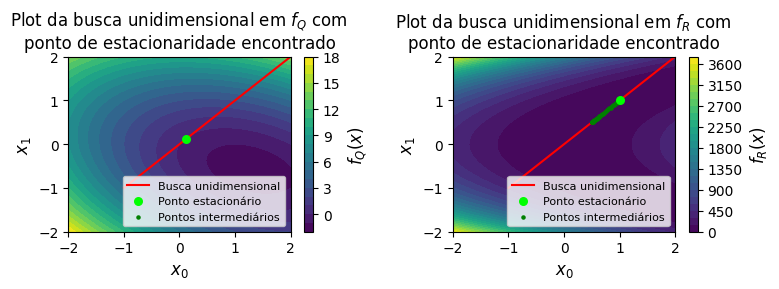

In [235]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)
functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)
direction = np.array([1,1])
shift = np.array([-1,-1])
alphas = np.linspace(0, 3, 1000)

points = np.array([alpha * direction + shift for alpha in alphas])

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot da busca unidimensional em $f_Q$ com \nponto de estacionaridade encontrado', fontsize=12)
ax1.axis('tight')

# Plot da linha referente à busca unidimensional e o ponto estacionário encontrado
ax1.plot(points[:, 0], points[:, 1], color='red', zorder=2, label='Busca unidimensional')
ax1.scatter(quadraticStationaryPoint[0], quadraticStationaryPoint[1], color='lime', s=30, zorder=4, label='Ponto estacionário')
ax1.scatter(quadraticIntermediatePoints[:,0], quadraticIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
ax1.legend(loc='lower right', fontsize=8)

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot da busca unidimensional em $f_R$ com \nponto de estacionaridade encontrado', fontsize=12)
ax2.axis('tight')

# Plot da linha referente à busca unidimensional e o ponto estacionário encontrado
ax2.plot(points[:, 0], points[:, 1], color='red', zorder=2, label='Busca unidimensional')
ax2.scatter(rosenbrockStationaryPoint[0], rosenbrockStationaryPoint[1], color='lime', s=30, zorder=4, label='Ponto estacionário')
ax2.scatter(rosenbrockIntermediatePoints[:,0], rosenbrockIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
ax2.legend(loc='lower right', fontsize=8)


plt.tight_layout()
plt.show()

## Discussão dos resultados

O número de iterações necessárias para encontrar o mínimo do corte do gradiente $g(\alpha) = \nabla f(x_0 + \alpha d)$ das funções acima foi extremamente diferentes entre elas. Como esperado, precisamos de apenas uma iteração para o caso quadrático ($f_Q$), visto que seu gradiente é linear e portanto o método da falsa posição nos dá diretamente o ponto de cruzamento com zero. 

No caso da função de Rosenbrock ($f_R$), a região em volta do zero do corte do gradiente torna a busca por esse método mais demorada, sendo necessárias mais de 90 iterações para achar o ponto zero com mesma precisão do caso quadrático. Um fator que pode contribuir com isso é o fato do corte obtido ser uma função até cúbica em $\alpha$, o que permitiria um número maior de zeros na função (e como podemos observcar nos gráficos acima, os zeros se encontram próximos uns dos outros, ao menos no caso analisado).

Tal fato já nos indica que cada iteração dos algoritmos de descida de gradiente será executada mais rápido, e podemos a princípio esperar que os algoritmos do trabalho encontrarão os pontos de mínimo mais rapidamente no caso quadrático. Isso está de acordo com nossas expectaticas, já que a função de Rosenbrock é construída de forma a ser problemática de se resolver com os algoritmos estudados nesse trabalho. Já a quadrática, sendo uma função fortemente convexa e com coeficientes bem condicionados, deveria ser de fácil reoslução.

Deve-se notar que a implementação usada aqui define os limites da busca linear de maneira hard-coded. Em tese, o algoritmo deveria buscar de forma aleatória ou com alguma estratégia mais bem definida os pontos iniciais para se iniciar a busca linear. Isto é, dado um ponto inicial, deveria-se procurar um outro ponto, na reta dada por $\alpha \vec{d}$, cujo valor do corte do gradiente fosse de sinal oposto ao ponto original (garantindo assim, por continuidade, a presença de pelo menos um zero no interior do intervalo). 


# Trabalho 2
 O objetivo agora é implementar métodos de otimização em sua totalidade, e analisar seu comportamento nas mesmas funções do trabalho 1. Aqui, iremos estudar os algoritmos de descida de gradiente e de Newton. 

No caso de uma forma quadrática, o algoritmo do gradiente ótimo pode assumir a forma simplificada dada por:

$$ x^{k+1} = x^{k} - \left[ \frac{(g^k)^T g^k}{(g^k)^T Q g^k} \right]g^k, \hspace{10pt} g^k = Qx^T- b $$

No caso da função de Rosenbrock, não podemos reduzí-la a uma quadrática, e portanto usaremos a forma original do algoritmo com mostrado na apostila. Vamos usar essa mesma estratégia para a função quadrática por comodidade.

## Implementação dos métodos da descida de gradiente e de Newton

In [244]:
def gradientDescent(gradient:callable, gradientCut:callable, initialPoint, gradientBound, maxIterDescent):

    precisionLinearSearch = 0.01
    maxIterLinearSearch = 1000

    currentMinimum = initialPoint
    currentGradient = gradient(initialPoint)
    intermediatePoints = [initialPoint]
    iterations = 0

    gradNorm = np.linalg.norm(currentGradient, ord=2)


    while np.linalg.norm(currentGradient, ord=2) >= gradientBound and iterations < maxIterDescent:
        iterations = iterations + 1

        minStep = 0
        maxStep = 1

        fixedGradientCut = partial(gradientCut, shift=currentMinimum, direction=currentGradient)
        step, _, _, _ = FalsePosition(fixedGradientCut, [minStep, maxStep], precisionLinearSearch, maxIterLinearSearch)

        currentMinimum = currentMinimum + step * currentGradient
        currentGradient = gradient(currentMinimum)
        intermediatePoints.append(currentMinimum)
        
    return currentMinimum, np.linalg.norm(currentGradient, ord=2), iterations, np.array(intermediatePoints)

def newtonMethod(gradient:callable, gradientCut:callable, hessian:callable, initialPoint, gradientBound, maxIterDescent):

    precisionLinearSearch = 0.01
    maxIterLinearSearch = 1000

    currentMinimum = initialPoint
    currentGradient = gradient(initialPoint)
    intermediatePoints = [initialPoint]
    iterations = 0

    gradNorm = np.linalg.norm(currentGradient, ord=2)


    while np.linalg.norm(currentGradient, ord=2) >= gradientBound and iterations < maxIterDescent:
        iterations = iterations + 1

        minStep = 0
        maxStep = 1

        inverseHessian = np.linalg.inv(hessian(currentMinimum))

        fixedGradientCut = partial(gradientCut, shift=currentMinimum, direction=inverseHessian @ currentGradient)
        step, _, _, _ = FalsePosition(fixedGradientCut, [minStep, maxStep], precisionLinearSearch, maxIterLinearSearch)

        currentMinimum = currentMinimum + step * inverseHessian @ currentGradient
        currentGradient = gradient(currentMinimum)
        intermediatePoints.append(currentMinimum)
        
    return currentMinimum, np.linalg.norm(currentGradient, ord=2), iterations, np.array(intermediatePoints)


## Método do gradiente ótimo

In [245]:
gradientBound = 1e-8
initialPoint = np.array([-1, -1])
maxIterDescent = 10000

quadraticMinimum, precision, iterations, quadraticIntermediatePoints = gradientDescent(_grad_fQ, quadraticGradientCut, initialPoint, gradientBound, maxIterDescent)

print('Ponto de mínimo : ', quadraticMinimum, '\n', 'Precisão obtida: ', precision, '\n', 'Total de iterações: ', iterations, '\n')
print('Valor da função objetivo: ', _fQ(quadraticMinimum))

Ponto de mínimo :  [ 1.28571428 -0.57142857] 
 Precisão obtida:  6.745078753185465e-09 
 Total de iterações:  23 

Valor da função objetivo:  -1.5714285714285712


In [246]:
gradientBound = 1e-8
initialPoint = np.array([-1, -1])
maxIterDescent = 10000

rosenbrockMinimum, precision, iterations, rosenbrockIntermediatePoints = gradientDescent(_grad_fR, quadraticGradientCut, initialPoint, gradientBound, maxIterDescent)

print('Ponto de mínimo : ', rosenbrockMinimum, '\n', 'Precisão obtida: ', precision, '\n', 'Total de iterações: ', iterations, '\n')
print('Valor da função objetivo: ', _fR(rosenbrockMinimum))

Ponto de mínimo :  [ 1.20664484 -0.52500377] 
 Precisão obtida:  270.28081482465257 
 Total de iterações:  10000 

Valor da função objetivo:  86.72175917362334


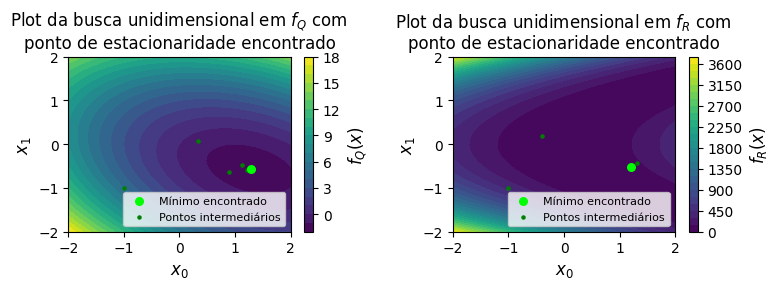

In [247]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)
functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)
direction = np.array([1,1])
shift = np.array([-1,-1])
alphas = np.linspace(0, 3, 1000)

points = np.array([alpha * direction + shift for alpha in alphas])

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot da busca unidimensional em $f_Q$ com \nponto de estacionaridade encontrado', fontsize=12)
ax1.axis('tight')

# Plot dos mínimos intermediários encontrados
ax1.scatter(quadraticMinimum[0], quadraticMinimum[1], color='lime', s=30, zorder=4, label='Mínimo encontrado')
ax1.scatter(quadraticIntermediatePoints[:,0], quadraticIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
ax1.legend(loc='lower right', fontsize=8)

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot da busca unidimensional em $f_R$ com \nponto de estacionaridade encontrado', fontsize=12)
ax2.axis('tight')

# Plot dos mínimos intermediários encontrados
ax2.scatter(rosenbrockMinimum[0], rosenbrockMinimum[1], color='lime', s=30, zorder=4, label='Mínimo encontrado')
ax2.scatter(rosenbrockIntermediatePoints[:,0], rosenbrockIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
ax2.legend(loc='lower right', fontsize=8)


plt.tight_layout()
plt.show()

## Método de Newton

In [248]:
gradientBound = 1e-8
initialPoint = np.array([-1, -1])
maxIterDescent = 10000

quadraticMinimum, precision, iterations, quadraticIntermediatePoints = newtonMethod(_grad_fQ, quadraticGradientCut, _hessian_fQ, initialPoint, gradientBound, maxIterDescent)

print('Ponto de mínimo : ', quadraticMinimum, '\n', 'Precisão obtida: ', precision, '\n', 'Total de iterações: ', iterations, '\n')
print('Valor da função objetivo: ', _fQ(quadraticMinimum))

Ponto de mínimo :  [ 1.28571429 -0.57142857] 
 Precisão obtida:  2.220446049250313e-16 
 Total de iterações:  1 

Valor da função objetivo:  -1.5714285714285712


In [249]:
gradientBound = 1e-8
initialPoint = np.array([-1, -1])
maxIterDescent = 10000

rosenbrockMinimum, precision, iterations, rosenbrockIntermediatePoints = newtonMethod(_grad_fR, quadraticGradientCut, _hessian_fR, initialPoint, gradientBound, maxIterDescent)

print('Ponto de mínimo : ', rosenbrockMinimum, '\n', 'Precisão obtida: ', precision, '\n', 'Total de iterações: ', iterations, '\n')
print('Valor da função objetivo: ', _fR(rosenbrockMinimum))

Ponto de mínimo :  [ 1.5 -1. ] 
 Precisão obtida:  224.05579662218068 
 Total de iterações:  10000 

Valor da função objetivo:  25.25


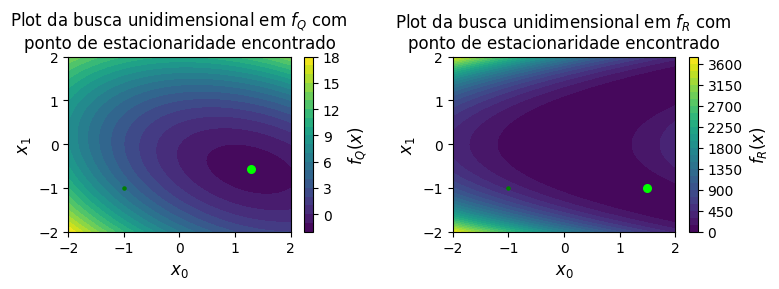

In [250]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)
functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)
direction = np.array([1,1])
shift = np.array([-1,-1])
alphas = np.linspace(0, 3, 1000)

points = np.array([alpha * direction + shift for alpha in alphas])

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot da busca unidimensional em $f_Q$ com \nponto de estacionaridade encontrado', fontsize=12)
ax1.axis('tight')

# Plot dos mínimos intermediários encontrados
ax1.scatter(quadraticMinimum[0], quadraticMinimum[1], color='lime', s=30, zorder=4, label='Mínimo encontrado')
ax1.scatter(quadraticIntermediatePoints[:,0], quadraticIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
# ax1.legend(loc='lower right', fontsize=8)

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot da busca unidimensional em $f_R$ com \nponto de estacionaridade encontrado', fontsize=12)
ax2.axis('tight')

# Plot dos mínimos intermediários encontrados
ax2.scatter(rosenbrockMinimum[0], rosenbrockMinimum[1], color='lime', s=30, zorder=4, label='Mínimo encontrado')
ax2.scatter(rosenbrockIntermediatePoints[:,0], rosenbrockIntermediatePoints[:,1], color='green', s=5, zorder=3, label='Pontos intermediários')
# ax2.legend(loc='lower right', fontsize=8)


plt.tight_layout()
plt.show()

## Discussão dos resultados

Em todos os casos estudados na tarefa 2, utilizamos os mesmos critérios de parada: valor da norma-2 do gradiente abaixo de 1e-8, ou 10000 iterações. Enquanto conseguimos encontrar o mínimo global da função quadrática com ambos os métodos, nenhum dos dois foi capaz de se aproximar do mínimo global da função de Rosenbrock.

No caso quadrático, percebemos uma clara melhora no número de iterações necessárias para se atingir o critério de gradiente mínimo. Como esperado, por se tratar de uma função objetivo quadrática, o método de Newton precisou de somente uma iteração para encontrar o ponto de minimo, já que ele se fornece a fórmula exata do ponto de mínimo nesse caso. 

No caso da função de Rosenbrock, obtemos também uma melhora no desempenho, mas agora em termos do valor mínimo da função objetivo. Em nenhum dos dois algoritmos chegamos perto do ponto de mínimo global conhecido (1,1), tenddo sido em ambos os casos atingido o número máximo de iterações. Percebemos que o algoritmo, após o primeiro passo, tem dificuldades de dar passos de magnitude significativa em qualquer direção, devido aos valores mal condicionados do gradiente e da Hessiana nas regiões de menor valor da função objetivo. 

A inversa da Hessiana nessa implementação é calculada de forma exata (a menos de erros numéricos) por uma função do numpy. Se estivéssemos medindo, além da performance em termos de aproximação do mínimo, a velocidade de execução do algoritmo, métodos utilizando aproximações da inversa see mostrariam possivelmente mais eficientes. 

Vemos então que o método do gradiente ótimo e de Newton, apesar de adequados para funções mais simples, podem se mostrar inificazes para funções mal condicionadas, sendo necessário explorar outros métodos se quisermos achar uma solução boa para a função de Rosenbrock, 